In [27]:
# 🧪 Model Exploration Notebook

#This notebook was used for early testing and prototyping of pollution prediction using SO₂ and NO₂.  
#Final training and evaluation are documented in `WEEK2/week2_model_training.ipynb`.  
#This file is retained for transparency and experimentation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))  # Adds project root to Python path
sys.path.append(os.path.abspath("."))  # Adds current directory to Python path
sys.path.append(os.path.abspath('../../archive')) # Adds archive directory to Python path


In [29]:
#Load the Data
df = pd.read_csv('../../main data/data.csv', encoding='ISO-8859-1', low_memory=False)

df.replace("NA", np.nan, inplace=True)
df.dropna(subset=['so2', 'no2', 'spm'], inplace=True)
df[['so2', 'no2', 'spm']] = df[['so2', 'no2', 'spm']].astype(float)

#Preview of the Data
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
11,150,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,14.1,NaN,133.0,NaN,NaN,1990-06-01
12,151,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,5.6,11.8,NaN,82.0,NaN,NaN,1990-06-01
13,152,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.3,19.3,NaN,111.0,NaN,NaN,1990-06-01
14,150,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,8.2,NaN,118.0,NaN,NaN,1990-07-01
15,152,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.5,12.1,NaN,135.0,NaN,NaN,1990-07-01


In [30]:
# Select features and target
X = df[['so2', 'no2']]
y = df['spm']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [31]:
#Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


R² Score: 0.1055
MAE: 110.01
MSE: 21546.16


In [32]:
#Calculate Error Percentage
error_percent = (mae / y_test.mean()) * 100
print(f"Error Percentage: {error_percent:.2f}%")


Error Percentage: 48.46%


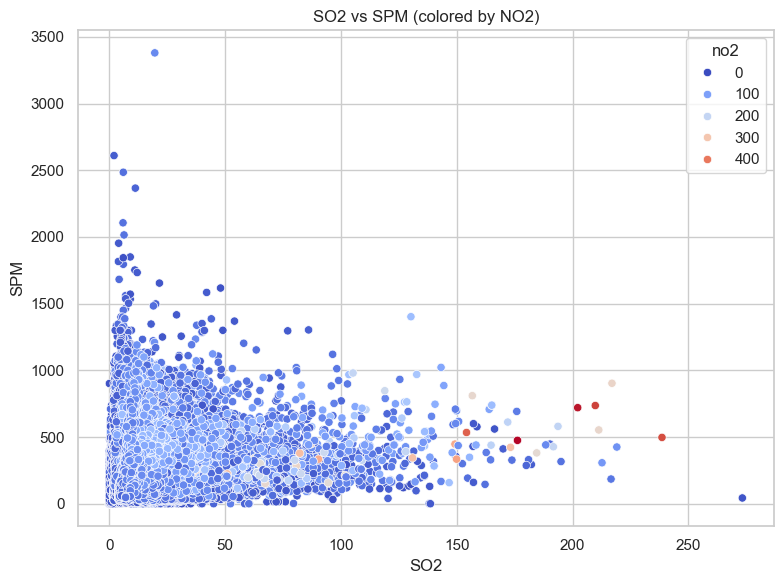

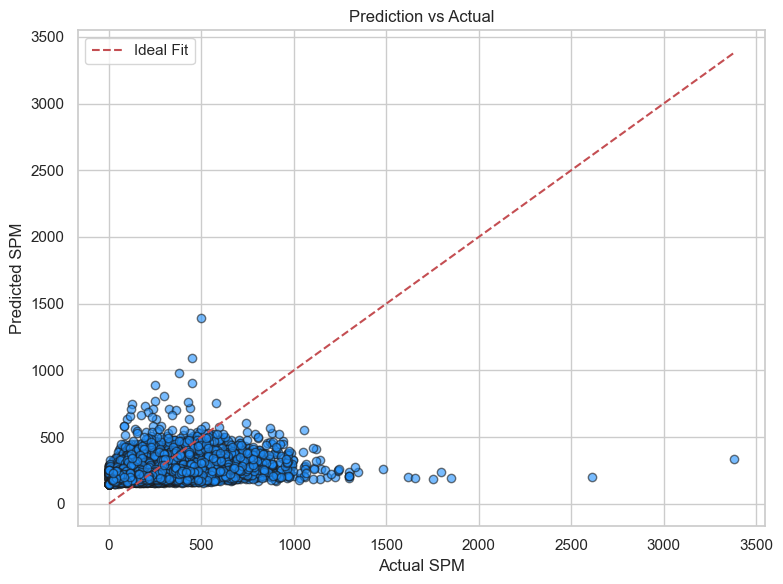

In [33]:
# Visualize SO₂ vs SPM colored by NO₂
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='so2', y='spm', hue='no2', palette='coolwarm')
plt.title('SO2 vs SPM (colored by NO2)')
plt.xlabel('SO2')
plt.ylabel('SPM')
plt.tight_layout()
plt.show()

# Visualize Prediction vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual SPM")
plt.ylabel("Predicted SPM")
plt.title("Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
from src.data_ingestion import load_data, preprocess_data
from src.Visualizer import plot_drift
# Load and clean the dataset
df = pd.read_csv('../../main data/data.csv', encoding='ISO-8859-1', low_memory=False)
def preprocess_data(df):
    direction_map = {
        'N': 0, 'NE': 45, 'E': 90, 'SE': 135,
        'S': 180, 'SW': 225, 'W': 270, 'NW': 315
    }
    
    if 'wind_direction' in df.columns:
        df['wind_angle'] = df['wind_direction'].map(direction_map)
    
    return df


# Preview the cleaned data
df.head()

# Visualize drift
def plot_drift(df):
    if all(col in df.columns for col in ['so2', 'no2', 'spm']):
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x='so2', y='spm', hue='no2', palette='coolwarm')
        plt.title('SO₂ vs SPM (colored by NO₂)')
        plt.xlabel('SO₂')
        plt.ylabel('SPM')
        plt.tight_layout()
        plt.show()
    else:
        print("Required columns not found in DataFrame.")


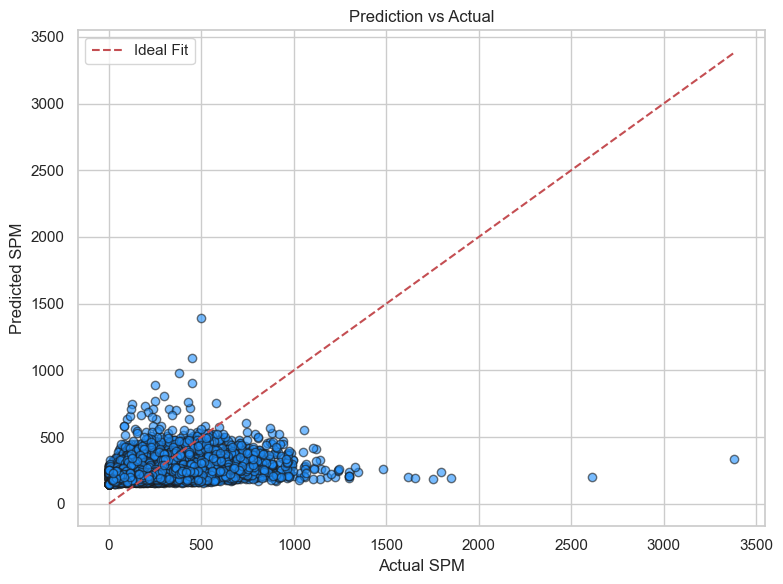


Model Evaluation Summary:
R² Score       : 0.1055
MAE            : 110.01
MSE            : 21546.16
Error %        : 48.46%


In [35]:
os.makedirs('../assets', exist_ok=True)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
ax.set_xlabel("Actual SPM")
ax.set_ylabel("Predicted SPM")
ax.set_title("Prediction vs Actual")
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('../assets/prediction_vs_actual.png', dpi=300)
plt.show()

# 📝 Print summary
print("\nModel Evaluation Summary:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"Error %        : {error_percent:.2f}%")

# 🗂️ Log metrics to file
os.makedirs('../../WEEK2', exist_ok=True)
with open('../../WEEK2/model_metrics.md', 'w') as f:
    f.write(f"### Model Evaluation\n")
    f.write(f"- R² Score: {r2:.4f}\n")
    f.write(f"- MAE: {mae:.2f}\n")
    f.write(f"- MSE: {mse:.2f}\n")
    f.write(f"- Error Percentage: {error_percent:.2f}%\n")
